In [3]:
import pandas as pd


In [4]:
data = pd.read_csv("Scaled_file.csv")

In [5]:
from sklearn.preprocessing import StandardScaler

# Drop target column if present; here we assume all columns are features
X = data.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.99893891  0.87839408 -1.05870558 ... -1.61573093  1.06206543
   1.06994305]
 [-0.99893891  0.87839408  0.94454966 ...  1.17483474  1.06206543
   1.06994305]
 [-0.99893891 -1.13844119 -1.05870558 ...  1.52365545  1.06206543
   1.06994305]
 ...
 [ 1.00106221  0.87839408  0.94454966 ...  1.52365545  1.06206543
  -0.77817683]
 [ 1.00106221  0.87839408  0.94454966 ...  0.82601403 -2.82682952
  -0.77817683]
 [ 1.00106221  0.87839408  0.94454966 ...  0.12837261  1.06206543
  -1.70223677]]


In [6]:
from sklearn.decomposition import PCA


In [7]:
# Assuming df is your DataFrame and 'Diabetes_binary' is your target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']


In [8]:
pca = PCA(n_components=10)
pca_scaled_data=pca.fit_transform(X_scaled)

In [9]:
# variance for each pca1,2,3..10 as ratio
pca.explained_variance_ratio_


array([0.1717153 , 0.08242566, 0.06102462, 0.05564143, 0.05418073,
       0.05154968, 0.04680198, 0.04289605, 0.0425269 , 0.03958415])

In [10]:
X_scaled.shape


(66877, 22)

In [11]:
pca_scaled_data.shape

(66877, 10)

In [12]:
pca_df = pd.DataFrame(pca_scaled_data, columns=[f'PCA_Component_{i+1}' for i in range(10)])
print("First 5 rows of PCA Components:")
print(pca_df.head())


First 5 rows of PCA Components:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0        -0.964592        -0.673254         0.202255         1.777095   
1         0.414179         1.720757        -0.851817         1.279823   
2        -2.550243         0.941238         0.852109         0.411577   
3        -0.912848         1.780567         0.144106         1.137837   
4        -2.271401         0.189478        -0.017099         0.858812   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0         1.565390         0.772754        -0.942447         0.020197   
1        -1.565252         0.814425        -1.605545        -1.664487   
2        -0.331868         0.341884        -0.850654         0.373368   
3        -0.191583        -0.714002         0.408292         0.444651   
4        -0.466228        -0.040059        -0.114559         1.463172   

   PCA_Component_9  PCA_Component_10  
0         0.489279          0.261438  
1        -0.

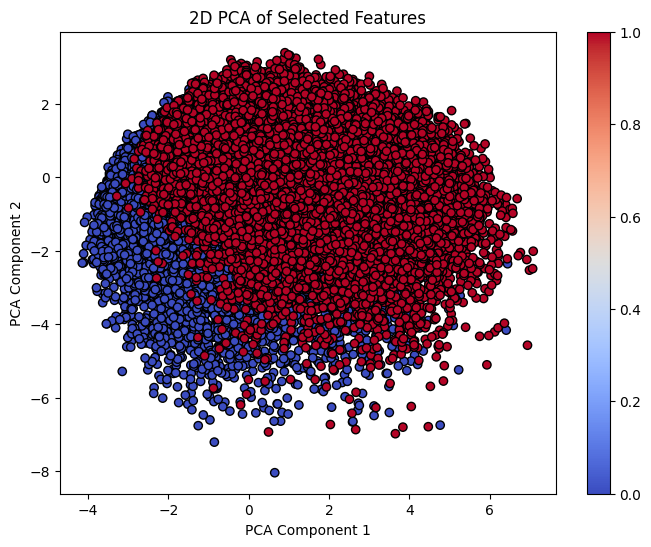

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_scaled_data[:,0], pca_scaled_data[:,1], c=data['Diabetes_binary'], cmap='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Selected Features')
plt.colorbar()
plt.show()

In [17]:

# Combine with target
final_pca = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

In [22]:
final_pca.head()


,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,Diabetes_binary
0,-0.964592,-0.673254,0.202255,1.777095,1.565390,0.772754,-0.942447,0.020197,0.489279,0.261438,0
1,0.414179,1.720757,-0.851817,1.279823,-1.565252,0.814425,-1.605545,-1.664487,-0.714420,-0.783478,0
2,-2.550243,0.941238,0.852109,0.411577,-0.331868,0.341884,-0.850654,0.373368,0.135337,-0.097125,0
3,-0.912848,1.780567,0.144106,1.137837,-0.191583,-0.714002,0.408292,0.444651,0.208366,0.877030,0
4,-2.271401,0.189478,-0.017099,0.858812,-0.466228,-0.040059,-0.114559,1.463172,0.849091,-0.431611,0


In [23]:
final_pca.to_csv('Pca_data.csv', index=False)